# <div align="center">CM2</div>


###  2.1 Required Libraries


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.downloader as api
from datasets import load_dataset
import re
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from scipy import spatial
import seaborn as sns

### 2.2 Load dataset 

In [3]:
dataset = load_dataset('climate_fever')
dataset['test']


Using custom data configuration default
Reusing dataset climate_fever (C:\Users\DELL\.cache\huggingface\datasets\climate_fever\default\1.0.1\3b846b20d7a37bc0019b0f0dcbde5bf2d0f94f6874f7e4c398c579f332c4262c)


Dataset({
    features: ['claim_id', 'claim', 'claim_label', 'evidences'],
    num_rows: 1535
})

### 2.3 Assigned claim  and evidence feature values to corpus ( In order to to apply word embedding )

In [4]:
sent_list = list()
for i in range(0, dataset["test"].num_rows):
    claim = dataset["test"][i]["claim"]
    sent_list.append(claim)
   
    for _, data in enumerate(dataset["test"][i]["evidences"]):
        article = data["article"]
        evidence = data["evidence"]
        sent_list.append(article)
        sent_list.append(evidence)
        


In [5]:
len(sent_list)

16885

### 2.4 Text/Data Preprocessing

In [6]:
corpus = []

for i in range (0,1534):
    claim = re.sub('[^a-zA-z]',' ', sent_list[i])
    claim = claim.lower()
    claim = claim.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    claim = [ps.stem(word) for word in claim if not word in set(all_stopwords)]
    claim = ' '.join(claim)
    corpus.append(claim)
    

### 2.5 Converted every word of the corpus to embedding vectors in order to embed the text dataset with Word2Vec

In [7]:
corpusVec = [nltk.word_tokenize(claim) for claim in corpus]

In [8]:
len(corpusVec)

1534

### 2.6 Built a word2Vec model

In [9]:
model = Word2Vec(corpusVec, min_count=1)
model.save("word2vec.bin")

### 2.7 Split word embeddings into train and test sets

- Train set (corpusVec_train) contains 80% of word embeddings ( CM2 part I and II).
- Test set (corpusVec_test) contains 20% of word embeddings (CM2 part III and IV ).

In [116]:
corpusVec_train, corpusVec_test = train_test_split(corpusVec,test_size=0.20,random_state = None)

#### 2.7.1 Created dictionaries to store word and it's embedding

In [117]:
embedding_train = dict()
embedding_test = dict()
#embedding_test= {'word', 'values'}

for sentence in corpusVec_train:
    for word in sentence:
        embedding_train[word] = model.wv[word]
        
for sentence in corpusVec_test:
    for word in sentence:
        embedding_test[word] = model.wv[word]

#### 2.7.2 Created train and test dataframe from embeddings

In [118]:
train_emb_df = pd.DataFrame(embedding_train)
test_emb_df = pd.DataFrame(embedding_test)

In [119]:
test_emb_df.head()

,global,cool,januari,hottest,month,ever,australia,averag,temperatur,exceed,...,famili,n,case,revis,upward,role,almost,three,today,thrive
0,-0.026006,-0.011229,-0.006648,-0.000850,-0.004649,0.001720,-0.011468,-0.024388,-0.044989,-0.006691,...,-0.001396,0.000601,-0.007260,0.002139,-0.005385,-0.002964,-0.006399,-0.005031,-0.009883,-0.004415
1,0.022598,0.011807,-0.000674,0.004829,0.006153,0.004475,0.009207,0.015170,0.037848,0.005509,...,-0.001372,0.001075,0.004348,0.006840,0.003717,0.002483,0.006312,-0.000342,0.002459,-0.003641
2,-0.005089,0.000265,0.002516,0.002618,-0.005541,0.000362,-0.004481,-0.004996,-0.012264,0.000503,...,-0.003661,-0.004298,0.003003,-0.001459,0.003445,-0.000055,-0.002934,-0.005092,-0.005759,-0.001071
3,0.003168,0.002775,-0.004008,0.000980,0.000113,0.000156,-0.000212,-0.003244,0.001034,0.002623,...,0.004947,-0.003822,-0.000681,-0.003386,-0.004442,-0.003067,0.003782,-0.004291,-0.004522,-0.001489
4,-0.060672,-0.023229,-0.004556,-0.008189,-0.012993,-0.005828,-0.022834,-0.047847,-0.088214,-0.009173,...,-0.000463,-0.001877,-0.005677,-0.006764,-0.010588,-0.010838,0.000449,-0.009807,-0.017840,0.001299


In [14]:
train_emb_df.head()

,late,th,centuri,scientif,consensu,evolv,increas,concentr,greenhous,gase,...,transport,equal,exhibit,chairman,affair,seriou,reject,precondit,section,dutch
0,-0.004184,-0.022699,-0.029572,-0.019894,-0.014478,-0.000021,-0.046867,-0.019497,-0.022218,-0.023295,...,-0.001727,-0.004806,-0.004135,0.001529,0.003135,0.001559,-0.004899,0.000144,-0.004987,-0.005375
1,0.000208,0.011434,0.025260,0.014197,0.003634,0.005895,0.037896,0.021260,0.025539,0.025560,...,0.002223,-0.000696,0.005607,0.003139,0.003429,-0.002068,-0.001082,0.002521,0.002653,-0.003045
2,-0.003391,-0.005212,-0.007817,-0.001660,-0.007228,0.002238,-0.017685,-0.001694,-0.010210,-0.011750,...,-0.003254,-0.003879,0.004449,-0.003586,0.001487,-0.000186,0.002114,-0.003566,-0.001746,0.002847
3,0.004808,0.002636,0.001091,0.001836,0.005306,-0.004611,0.001751,-0.001221,0.004334,-0.002342,...,0.003010,0.004428,-0.000980,0.002045,0.003726,0.004720,0.001786,-0.001450,0.001385,-0.003299
4,-0.006628,-0.041191,-0.057258,-0.043912,-0.026514,-0.002943,-0.101817,-0.046994,-0.060712,-0.064505,...,-0.006536,-0.001998,0.002172,-0.005785,0.001312,-0.001335,0.002149,0.001488,0.000610,-0.005955


In [15]:
print(model)

Word2Vec(vocab=2397, size=100, alpha=0.025)


In [16]:
words = list(model.wv.vocab)
len(words)

2397

### 2.8 Built a PCA model


- The word embedding comes in a very high dimensionality, which means it is impossible to visualize how words occupy the embedding space. A method such as Principal Component Analysis (PCA) is normally implemented to reduce the dimensionality of word embedding.
- Principal Component Analysis (PCA) is one of the most useful techniques in Exploratory Data Analysis to understand the data, reduce dimensions of data.


**Parameters :**
- n_components (int,float or 'mle') : Number of components to keep. After applying PCA our result will be converted in words X n_components. Default value is None. If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension.

**Attributes :**
- explained_variance_ ( ndarray of shape (n_components,) ) : The amount of variance explained by each of the selected components.
- explained_variance_ : Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

**Note :**
- The 'None' case in n_components results : n_components == min(n_samples, n_features) - 1



IndexError: index 100 is out of bounds for axis 0 with size 100

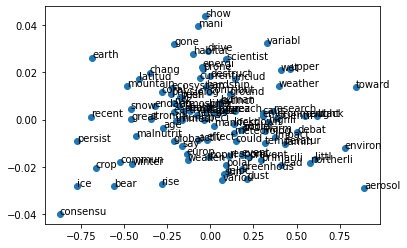

In [22]:
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(train_emb_df)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

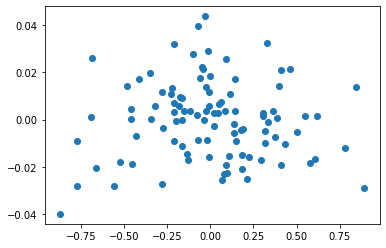

In [23]:
pyplot.scatter(result[:, 0], result[:, 1])

#### 2.8.1 Analysis of PCA model

- We built a 2-dimensional PCA model of the word vectors so that we easily analyze words in 2-D vision.
- X and Y axis are resulting vector of PCA model. As we have window_size is 100, model will create 100 X 2 variable result ( window_size in Word2Vec is 100 and n_component in PCA is 2).


**Note :**
- Error which is shown in above figure is occurred as we have window_size in word2Vec model is 100 (default value). 

In [24]:
result.shape

(100, 2)

### 2.9 Scree Plot in PCA

- The scree plot is a line plot used to determine how many factors to retain.
- In order to compare the variance explained by each principal component scree plot is useful in PCA.

**Note :**
We used train dataset to plot and visualise Scree plot in PCA

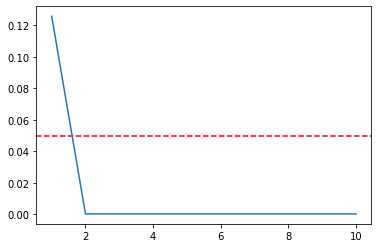

In [25]:
pca = PCA()
pc_comp = pca.fit_transform(train_emb_df)
PC_values = np.arange(10) + 1
#plt.ylim(0,max(screeplot.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=0.05,color='r',linestyle='--')
plt.plot(PC_values,pca.explained_variance_[:10])
plt.show()

#### 2.9.1 Analysis of Scree plot

-  We decided to choose the first two components that explain %95 of all information ( explained_variance_ values should be below red-dotted line to achieve more than 95% ). 
-  When number of components are more that 2 we achivev similar explained variance for dataset.


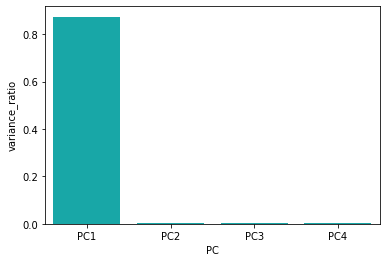

In [27]:
pca2 = PCA(n_components =4)
pca2_comp = pca2.fit_transform(train_emb_df)
df_pca = pd.DataFrame({'variance_ratio':pca2.explained_variance_ratio_[:4],'variance':pca2.explained_variance_[:4],
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="variance_ratio", 
           data=df_pca, color="c");

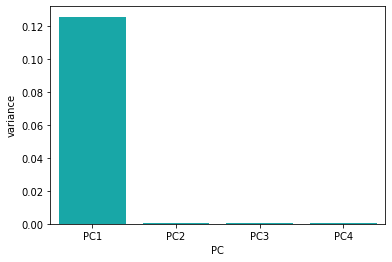

In [28]:
sns.barplot(x='PC',y="variance", 
           data=df_pca, color="c");

#### 2.9.2 Analysis of bar plot 

- First bar plot uses explained_variance_ratio_ attribute and second bar plot uses explained_variance attribute of PCA.
- From above 2 bar graphs, it is cleared that in PC1 ( 1 Principal Component only ) model have variance(0.12) and variance ratio (0.8) between vectors. However after that as principal component increase model don't have any ( or very small amount ) of variance. 

### 2.10 Visualisation of first Four dimensionality for PCA model

- For this visualisation we used test dataframe.
- We used subplot function for matplotlib package to compare dimensionality of PCA model.


In [30]:
pca = PCA()
pc_comp = pca.fit_transform(test_emb_df)
pca_4 = pd.DataFrame(pc_comp)
pca_4 = pca_4.iloc[:, [0,1,2,3]]
pca_4.head()

,0,1,2,3
0,-0.209345,-0.022775,-0.005724,0.003348
1,0.311517,0.011573,0.004177,-0.007542
2,-0.013236,-0.017950,-0.004714,0.017240
3,0.091419,-0.004783,-0.006555,-0.011025
4,-0.547432,0.001368,0.009593,-0.017717


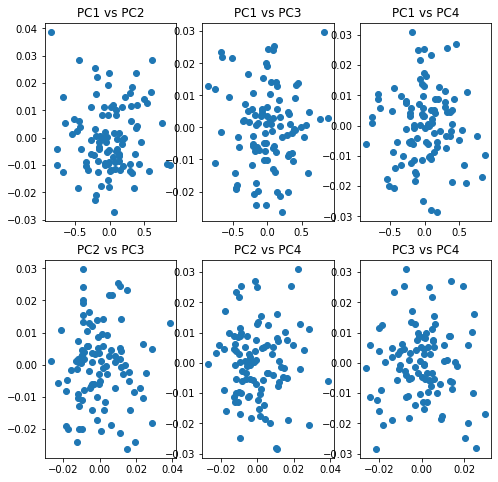

In [175]:
plt.figure(figsize=(8,8))

plt.subplot(2,3,1)
#fig = plt.figure(figsize=(7,7))
plt.title("PC1 vs PC2")
plt.scatter(x = pca_4[0], y = pca_4[1])


plt.subplot(2,3,2)
#fig = plt.figure(figsize=(7,7))
plt.title("PC1 vs PC3")
plt.scatter(x = pca_4[0], y = pca_4[2])

#fig = plt.figure(figsize=(7,7))
plt.subplot(2,3,3)
plt.title("PC1 vs PC4")
plt.scatter(x = pca_4[0], y = pca_4[3])


#fig = plt.figure(figsize=(7,7))
plt.subplot(2,3,4)
plt.title("PC2 vs PC3")
plt.scatter(x = pca_4[1], y = pca_4[2])


#fig = plt.figure(figsize=(7,7))
plt.subplot(2,3,5)
plt.title("PC2 vs PC4")
plt.scatter(x = pca_4[1], y = pca_4[3])

#fig = plt.figure(figsize=(7,7))
plt.subplot(2,3,6)
plt.title("PC3 vs PC4")
plt.scatter(x = pca_4[2], y = pca_4[3])

#### 2.10.1 Analysis of first four dimensions of PCA model

- From above scatter plot, we are making points to compare PCA model from 1 dimension to 4 dimension.
- As the graph will be same if we compare PCA with m x n dimensions vs n x m dimensions. So we have plotted 6 subplots ( instead of 16 ).

**Comparision :**
1. Most of the points in dimensions 1 to 4 are fall under [0.01,0.01].
2. However from each points in scatter plot, it is cleared that all PCA dimensions are not same. That means all dimensions embedding value are not same in PCA. ( e.g. model is not getting all points which have X and Y have same values).

#### 2.10.2 How PCA embedding applied on the Word2Vec embeddings

- Word2Vec is a supervised prediction model that aims at predicting the context of a word given the word (Skip-Gram) or the word given its context (Continuous Bag of Words).
- PCA is a general unsupervised Matrix Factorization method for dimensionality reduction.
- We can use PCA to visualize word embeddings, because the embedded space is still high-dimensional and cannot be presented for the human eyes. So PCA can be very useful to analyze word embeddings.
- PCA works on the square covariance matrix to find a lower-dimensional projection for the original set variables such that the lower-dimensional covariance matrix still maintains much of the original variance of the original set of variables.


### 2.11 Cosine similarity in PCA

- Cosine similiarity between two vectors (A and B) can be calculated using dot(A, B)/(norm(A)*norm(B)). Here norm(A) and norm(B) indicates euclidean norm of vectors respectively.

**Note :** In order to build a function for cosine similarity we used scipy.spatial.distance.cosine.

In [120]:
def cos_similarity(v1, v2):
    return abs(1 - spatial.distance.cosine(v1,v2))

In [121]:
pca3 = PCA(n_components =4)
Principal_comp = pca3.fit_transform(test_emb_df)

#### 2.11.1 Steps to perform on dataframe in order to calculate cosine similarity

1. Created Dictonary and Dataframe to store test set words

In [ ]:
my_dict = {'word':test_emb_df.columns}
dict_df = pd.DataFrame(my_dict)

2. Arranged columns in dataframe and move word column to first

In [131]:
data = pd.DataFrame(Principal_comp)
data['word'] = dict_df['word']
column_names = ["word", 0, 1, 2, 3]
data = data.reindex(columns = column_names)

data.head()

,word,0,1,2,3
0,global,-0.208022,-0.028763,-0.007627,-0.014650
1,cool,0.310110,0.002746,0.000278,-0.008928
2,januari,-0.013922,-0.028403,0.014315,-0.007691
3,hottest,0.090588,0.009651,-0.009248,-0.000387
4,month,-0.544951,-0.004317,-0.012025,-0.009497


3. Applied transformation so that we can apply cosine similarity ( Making Dataframe same as Word2Vec)

In [132]:
data_t = data.T
data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
word,global,cool,januari,hottest,month,ever,australia,averag,temperatur,exceed,...,occur,time,last,glacial,maximum,approach,predispos,consider,evid,recent
0,-0.208022,0.310110,-0.013922,0.090588,-0.544951,0.824022,0.050431,-0.203125,-0.673558,0.355714,...,0.604841,-0.147625,0.018456,0.131462,0.568355,-0.451850,-0.041424,-0.405264,0.325346,0.319725
1,-0.028763,0.002746,-0.028403,0.009651,-0.004317,-0.009512,-0.009532,-0.008334,0.001064,-0.022331,...,0.006989,-0.003871,0.016268,-0.003208,0.003002,-0.013602,-0.003554,-0.005998,-0.003476,0.002904
2,-0.007627,0.000278,0.014315,-0.009248,-0.012025,0.009320,-0.009394,-0.005431,0.019017,-0.000499,...,-0.006850,-0.004841,-0.006721,0.020478,-0.007039,0.002763,0.011604,0.010709,-0.014920,0.031279
3,-0.014650,-0.008928,-0.007691,-0.000387,-0.009497,0.008512,-0.023750,0.004380,0.018856,0.002524,...,-0.006438,0.011285,0.010497,-0.014443,0.011208,0.010975,0.013223,0.015033,0.023875,-0.008154


4. Assigned columns name same  first row ( Words)

In [133]:
header_row = 0
data_t.columns = data_t.iloc[header_row]
data_t.head()

word,global,cool,januari,hottest,month,ever,australia,averag,temperatur,exceed,...,occur,time,last,glacial,maximum,approach,predispos,consider,evid,recent
word,global,cool,januari,hottest,month,ever,australia,averag,temperatur,exceed,...,occur,time,last,glacial,maximum,approach,predispos,consider,evid,recent
0,-0.208022,0.310110,-0.013922,0.090588,-0.544951,0.824022,0.050431,-0.203125,-0.673558,0.355714,...,0.604841,-0.147625,0.018456,0.131462,0.568355,-0.451850,-0.041424,-0.405264,0.325346,0.319725
1,-0.028763,0.002746,-0.028403,0.009651,-0.004317,-0.009512,-0.009532,-0.008334,0.001064,-0.022331,...,0.006989,-0.003871,0.016268,-0.003208,0.003002,-0.013602,-0.003554,-0.005998,-0.003476,0.002904
2,-0.007627,0.000278,0.014315,-0.009248,-0.012025,0.009320,-0.009394,-0.005431,0.019017,-0.000499,...,-0.006850,-0.004841,-0.006721,0.020478,-0.007039,0.002763,0.011604,0.010709,-0.014920,0.031279
3,-0.014650,-0.008928,-0.007691,-0.000387,-0.009497,0.008512,-0.023750,0.004380,0.018856,0.002524,...,-0.006438,0.011285,0.010497,-0.014443,0.011208,0.010975,0.013223,0.015033,0.023875,-0.008154


5. Removed 1st row as words are now moved as column names

In [134]:
data_t = data_t.iloc[1:]
data_t.head()

word,global,cool,januari,hottest,month,ever,australia,averag,temperatur,exceed,...,occur,time,last,glacial,maximum,approach,predispos,consider,evid,recent
0,-0.208022,0.310110,-0.013922,0.090588,-0.544951,0.824022,0.050431,-0.203125,-0.673558,0.355714,...,0.604841,-0.147625,0.018456,0.131462,0.568355,-0.451850,-0.041424,-0.405264,0.325346,0.319725
1,-0.028763,0.002746,-0.028403,0.009651,-0.004317,-0.009512,-0.009532,-0.008334,0.001064,-0.022331,...,0.006989,-0.003871,0.016268,-0.003208,0.003002,-0.013602,-0.003554,-0.005998,-0.003476,0.002904
2,-0.007627,0.000278,0.014315,-0.009248,-0.012025,0.009320,-0.009394,-0.005431,0.019017,-0.000499,...,-0.006850,-0.004841,-0.006721,0.020478,-0.007039,0.002763,0.011604,0.010709,-0.014920,0.031279
3,-0.014650,-0.008928,-0.007691,-0.000387,-0.009497,0.008512,-0.023750,0.004380,0.018856,0.002524,...,-0.006438,0.011285,0.010497,-0.014443,0.011208,0.010975,0.013223,0.015033,0.023875,-0.008154


6. Words available to apply cosine similarity can be found by fetching column names

In [135]:
data_t.columns

Index(['global', 'cool', 'januari', 'hottest', 'month', 'ever', 'australia',
       'averag', 'temperatur', 'exceed', 'c', 'f', 'ipcc', 'publish', 'five',
       'comprehens', 'assess', 'report', 'review', 'latest', 'climat',
       'scienc', 'well', 'number', 'special', 'particular', 'topic', 'wind',
       'power', 'scientif', 'consensu', 'chang', 'turbin', 'windmil', 'like',
       'structur', 'specif', 'develop', 'gener', 'electr', 'critic', 'stem',
       'fact', 'phrase', 'intellig', 'design', 'make', 'use', 'assumpt',
       'qualiti', 'observ', 'concept', 'definit', 'conscious', 'particul',
       'project', 'appli', 'end', 'st', 'centuri', 'rel', 'th', 'earth',
       'increas', 'surfac', 'acceler', 'inorgan', 'carbon', 'cycl', 'reduc',
       'co', 'concentr', 'level', 'lethal', 'low', 'plant', 'ppm',
       'photosynthesi', 'approxim', 'million', 'year', 'postul', 'period',
       'coincid', 'cluster', 'volcano', 'collaps', 'event', 'perhap', 'warm',
       'occur', 'time', 

In [136]:
data_t = data_t.astype("float32")

#### 2.11.2 Cosine similarity on test set for PCA model

In [168]:
ex6 = cos_similarity(data_t["global"], data_t["warm"])
print(f"The Cosine Similarity between 'global' and 'warm': {ex6}.")

ex7 =cos_similarity(data_t["climat"], data_t["chang"])
print(f"The Cosine Similarity between 'climat' and 'chang': {ex7}.")

ex8 = cos_similarity(data_t["month"], data_t["year"])
print(f"The Cosine Similarity between 'month' and 'year': {ex8}.")

ex9 = cos_similarity(data_t["time"], data_t["million"])
print(f"The Cosine Similarity between 'time' and 'million': {ex9}.")

ex12 = cos_similarity(data_t["recent"], data_t["period"])
print(f"The Cosine Similarity between 'recent' and 'period': {ex12}.")

ex13 = cos_similarity(data_t["fact"], data_t["assumpt"])
print(f"The Cosine Similarity between 'fact' and 'assumpt': {ex13}.")

The Cosine Similarity between 'global' and 'warm': 0.9762625098228455.
The Cosine Similarity between 'climat' and 'chang': 0.9416069388389587.
The Cosine Similarity between 'month' and 'year': 0.9984747767448425.
The Cosine Similarity between 'time' and 'million': 0.671112596988678.
The Cosine Similarity between 'recent' and 'period': 0.7630232572555542.
The Cosine Similarity between 'fact' and 'assumpt': 0.5497466921806335.


#### 2.11.3 Cosine similarity on test set for Word2Vec model ( Using same words which was choosen in PCA cosine similarity )

In [173]:
ex1 = cos_similarity(embedding_test["global"], embedding_test["warm"])
print(f"The Cosine Similarity between 'global' and 'warm': {ex1}.")

ex2 =cos_similarity(embedding_train["climat"], embedding_test["chang"])
print(f"The Cosine Similarity between 'climat' and 'chang': {ex2}.")

ex3 = cos_similarity(embedding_test["month"], embedding_test["year"])
print(f"The Cosine Similarity between 'month' and 'year': {ex3}.")

ex4 = cos_similarity(embedding_test["time"], embedding_test["million"])
print(f"The Cosine Similarity between 'time' and 'million': {ex4}.")

ex5 = cos_similarity(embedding_test["recent"], embedding_test["period"])
print(f"The Cosine Similarity between 'recent' and 'period': {ex5}.")

ex6 = cos_similarity(embedding_test["fact"], embedding_test['assumpt'])
print(f"The Cosine Similarity between 'fact' and 'assumpt': {ex6}.")

The Cosine Similarity between 'global' and 'warm': 0.990479052066803.
The Cosine Similarity between 'climat' and 'chang': 0.996075451374054.
The Cosine Similarity between 'month' and 'year': 0.8870692253112793.
The Cosine Similarity between 'time' and 'million': 0.9666134715080261.
The Cosine Similarity between 'recent' and 'period': 0.9881159663200378.
The Cosine Similarity between 'fact' and 'assumpt': 0.283026784658432.


#### 2.11.4 Analysis and comparison of cosine similarity in PCA and Word2Vec model

- From above result it is clear that cosine similarity will not remain same in PCA.
- Moreover Word2Vec model maps words to real number vectors, at the same time capturing something about the meaning of the text. It says that if two words have similar meaning they will lie close to each other in the dense space.
- Whereas PCA model represents these word vectors in a n-dimensional space using matplotlib.
- Hence we can see change in cosine similarty value in words.


**Note :**

- We also analyze that many words cosine similarity value near to 1  in PCA model (Compare to word2Vec) due to dimensionality reduction.